<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

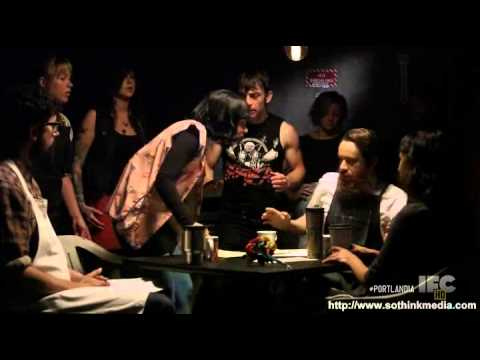

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/maria/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"




shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [27]:
#Clean up data 

#df['brand'] = df['brand'].apply(lambda x: x.lower())



#Clean up star rating 
shops['rating']=shops['star_rating'].apply(lambda x: x.split(' ')[1])


In [45]:
#Clean up reviews 

shops['text']=shops['full_review_text'].apply(lambda x: x[x.strip().find(' ')+2:])



In [74]:
checkins=['1 check-in ', '2 check-ins ', '3 check-ins', '4 check-ins ', '5 check-ins ', '6 check-ins ']

new=[]
for t in shops['text']:
    for x in checkins: 
        t=t.strip(x)
    new.append(t)

        

In [77]:
shops['text']=new

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [78]:
shops

,coffee_shop_name,full_review_text,star_rating,rating,text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,Love love loved the atmosphere! Every corner o...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,Listed in Brunch Spots I loved the eclectic an...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,They are located within the Northcross mall sh...
...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,4.0,I actually step into this restaurant by chance...
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,5.0,"Ok, The Steeping Room IS awesome. How do they ..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4.0,"Loved coming here for tea, and the atmosphere ..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,3.0,The food is just average. The booths didn't fe...


In [80]:
#Base
from collections import Counter 
import re 

import pandas as pd 

#plotting
import squarify
import matplotlib.pyplot as plt 
import seaborn as sns 

#NLP libraries 
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_lg')

In [83]:
#Make reviews into tokens 

tokenizer = Tokenizer(nlp.vocab)

tokens = []

for doc in tokenizer.pipe(shops['text'], batch_size=500):
    doc_tokens=[token.text for token in doc]
    tokens.append(doc_tokens)
    
shops['tokens']=tokens

In [91]:
def count(docs):
    """Function to product a summary table of the tokens"""
    
    word_counts=Counter()
    appears_in=Counter()
    
    total_docs=len(docs)
    
    for doc in docs: 
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp=zip(word_counts.keys(), word_counts.values())
    
    wc=pd.DataFrame(temp, columns= ['word', 'count'])
    
    wc['rank']=wc['count'].rank(method='first', ascending=False)
    total=wc['count'].sum()
    
    wc['pct_total']=wc['count'].apply(lambda x: x/total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total']=wc['pct_total'].cumsum()
    
    t2=zip(appears_in.keys(), appears_in.values())
    ac=pd.DataFrame(t2, columns = ['word', 'appears_in'])
    wc=ac.merge(wc, on='word')
    
    wc['appears_in_pct']=wc['appears_in'].apply(lambda x: x/total_docs)
    
    return wc.sort_values(by='rank')
    
    

In [93]:
result = count(shops['tokens'])
result

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
21,the,6520,27779,1.0,0.035235,0.035235,0.856092
33,and,6804,25748,2.0,0.032659,0.067895,0.893382
36,a,6181,22085,3.0,0.028013,0.095908,0.811581
50,I,5469,19780,4.0,0.025089,0.120997,0.718093
66,to,5631,16904,5.0,0.021441,0.142438,0.739364
...,...,...,...,...,...,...,...
44734,restrictions.,1,1,44737.0,0.000001,0.999995,0.000131
44739,"specially,",1,1,44738.0,0.000001,0.999996,0.000131
44736,"digestion,",1,1,44739.0,0.000001,0.999997,0.000131
44735,Iced.,1,1,44740.0,0.000001,0.999999,0.000131


In [94]:
#now let's remove all the crap from the text 

tokens = []

for doc in tokenizer.pipe(shops['text'], batch_size=500):
    
    doc_tokens =[]
    
    for token in doc: 
        if (token.is_stop==False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
shops['tokens']=tokens

In [95]:
shops['tokens']

0       [love, love, loved, atmosphere!, corner, coffe...
1       [listed, date, night:, austin,, ambiance, aust...
2       [listed, brunch, spots, loved, eclectic, homey...
3       [cool, decor!, good, drinks, nice, seating,  ,...
4       [located, northcross, mall, shopping, center, ...
                              ...                        
7611    [actually, step, restaurant, chance, favorites...
7612    [ok,, steeping, room, awesome., great, menu, i...
7613    [loved, coming, tea,, atmosphere, pretty, fres...
7614    [food, average., booths, didn't, feel, clean.,...
7615    [finally, stopped, lunch, colleague, i'm, glad...
Name: tokens, Length: 7616, dtype: object

In [96]:
#Finally, get do lemmatization with spacy

ex = 'This is a girls clubbing'

nlp = spacy.load('en_core_web_lg')

doc=nlp(ex)

for token in doc: 
    print(token.lemma_)


this
be
a
girl
clubbing


In [127]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if((token.is_stop == False) and (token.is_punct == False) and (token.pos_!='PRON')):
            lemmas.append(token.lemma_.lower())
    return lemmas 

In [128]:
shops['lemmas']=shops['text'].apply(get_lemmas)

In [113]:
count(shops['lemmas'])

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,,4343,14990,1.0,0.040369,0.040369,0.570247
36,coffee,4943,10683,2.0,0.028770,0.069139,0.649028
124,place,3885,6040,3.0,0.016266,0.085405,0.510110
151,good,3579,5362,4.0,0.014440,0.099845,0.469932
127,great,2860,3960,5.0,0.010665,0.110510,0.375525
...,...,...,...,...,...,...,...
14936,predictably,1,1,14939.0,0.000003,0.999989,0.000131
14938,windowed,1,1,14940.0,0.000003,0.999992,0.000131
14940,actuality,1,1,14941.0,0.000003,0.999995,0.000131
14939,crass,1,1,14942.0,0.000003,0.999997,0.000131


In [111]:
result=count(shops['lemmas'])

In [114]:
result=result.drop(4, axis=0)

In [122]:
#create a plot with the viz of the biggest counts
import squarify
import matplotlib.pyplot as plt


def pplot(result):
    
    result_top20 = result[result['rank'] <= 20]

    squarify.plot(sizes=result_top20['pct_total'], label=result_top20['word'], alpha=.8 )
    plt.axis('off')
    plt.show()


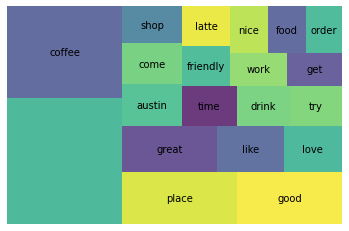

In [149]:
# final = 
shops['rating']=shops['rating'].apply(lambda x: float(x))
shops['rating'].dtype
good = shops[shops['rating'] > 3.0]

pplot(count(good['lemmas']))

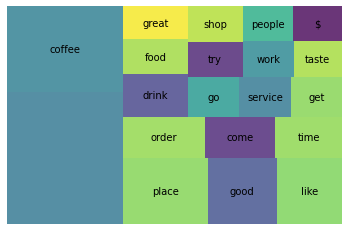

In [147]:
bad = shops[shops['rating'] < 4.0]

pplot(count(bad['lemmas']))

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [151]:
goods = count(good['lemmas'])
bads = count(bad['lemmas'])

In [166]:
result=goods.merge(bads, on='word')

result['diff']=abs(result['count_x']-result['count_y'])

In [169]:
result.sort_values(by='diff', ascending=False)
result=result.reset_index()



In [173]:
result_top20 = result[result['rank'] <= 20]

result_top20

,index,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,diff,rank
0,0,,3408,11626,1.0,0.040154,0.040154,0.555049,935,3364,1.0,0.041130,0.041130,0.633469,8262,0
1,1,coffee,3992,8484,2.0,0.029302,0.069456,0.650163,951,2199,2.0,0.026886,0.068016,0.644309,6285,1
2,2,place,3130,4810,3.0,0.016613,0.086069,0.509772,755,1230,3.0,0.015039,0.083055,0.511518,3580,2
3,3,good,2931,4358,4.0,0.015052,0.101121,0.477362,648,1004,4.0,0.012275,0.095331,0.439024,3354,3
4,4,great,2512,3488,5.0,0.012047,0.113168,0.409121,348,472,11.0,0.005771,0.151084,0.235772,3016,4
5,5,like,1677,2433,6.0,0.008403,0.121571,0.273127,596,945,5.0,0.011554,0.106885,0.403794,1488,5
6,6,love,1612,2133,7.0,0.007367,0.128938,0.262541,208,252,38.0,0.003081,0.263030,0.140921,1881,6
7,7,austin,1583,2038,8.0,0.007039,0.135977,0.257818,252,298,29.0,0.003644,0.233528,0.170732,1740,7
8,8,come,1482,1990,9.0,0.006873,0.142850,0.241368,452,650,7.0,0.007947,0.124112,0.306233,1340,8
9,9,shop,1330,1779,10.0,0.006144,0.148994,0.216612,315,430,16.0,0.005257,0.178068,0.213415,1349,9


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

